In [79]:
import seaborn as sns
import pandas as pd
import numpy as np

In [163]:
data = pd.read_csv(r'D:/work/Data/max_numeric_values.csv')

In [164]:
data

,video_id,max_views,max_likes,max_dislikes,max_comment_count,category_id
0,ceJcHUoO734,347988,7699,2111,1,13.0
1,ipWfcK1HVdA,2908064,46563,1570,2737,9.0
2,TKGA7MhxPWc,886234,80973,706,6881,5.0
3,S6YYun90S8g,1291227,24475,1700,6769,2.0
4,mWaY32HWjKE,1252,11,1,4,16.0
...,...,...,...,...,...,...
6347,Su6KVN33Bew,542870,9565,161,518,9.0
6348,3ekEfYNQJ1s,66068,404,47,81,9.0
6349,dYXaxeJBj5k,2503011,108077,1605,1338,7.0
6350,rew7FoGy1Po,608289,20629,795,1601,11.0


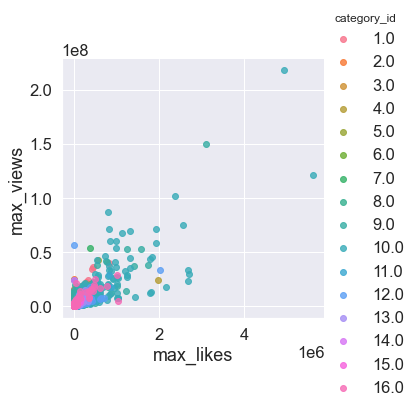

In [165]:
sns.lmplot(
    "max_likes", "max_views", data=data, hue="category_id", fit_reg=False)

In [166]:
# Import all required modules
import pandas as pd
import numpy as np

# Disable warnings
import warnings
warnings.filterwarnings("ignore")

# Import plotting modules
import seaborn as sns
sns.set()
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.ticker
%matplotlib inline

In [167]:
# Tune the visual settings for figures in `seaborn`
sns.set_context(
    "notebook", 
    font_scale=1.5,       
    rc={ 
        "figure.figsize": (11, 8), 
        "axes.titlesize": 18 
    }
)

from matplotlib import rcParams
rcParams['figure.figsize'] = 11, 8

In [168]:
df = pd.read_csv(r'C:\Users\fuJdf\ML_course.ai\Data\mlbootcamp5_train.csv')
# print('Dataset size: ', df.shape)
df.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0


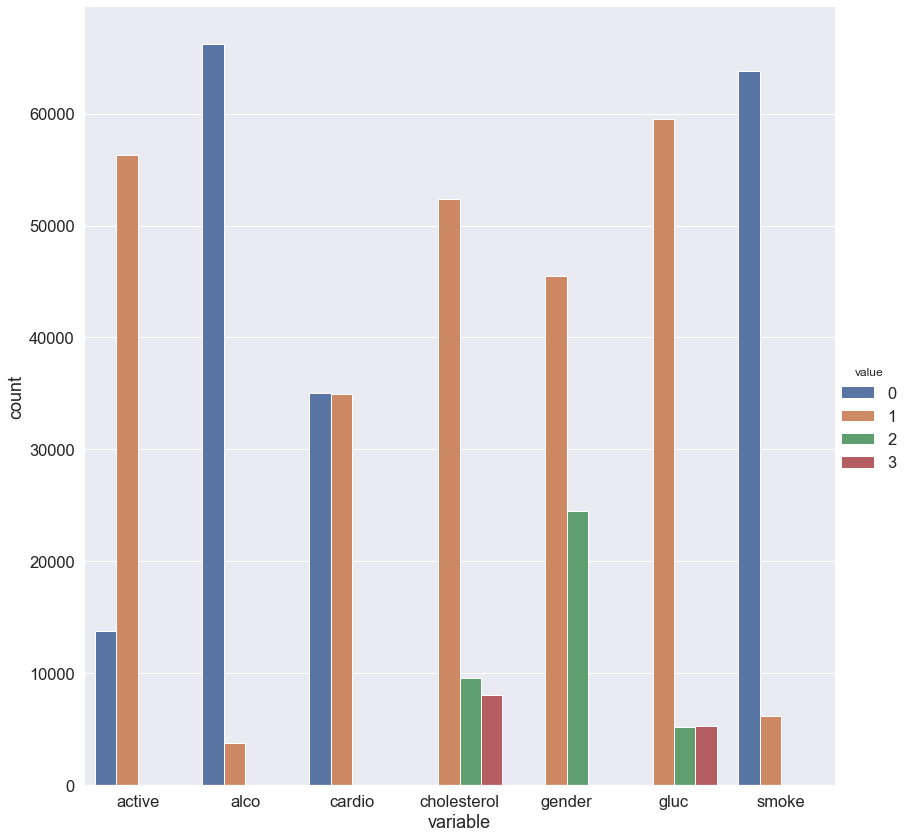

In [169]:
df_uniques = pd.melt(frame=df, value_vars=['gender','cholesterol', 
                                           'gluc', 'smoke', 'alco', 
                                           'active', 'cardio'])
df_uniques = pd.DataFrame(df_uniques.groupby(['variable', 
                                              'value'])['value'].count()) \
    .sort_index(level=[0, 1]) \
    .rename(columns={'value': 'count'}) \
    .reset_index()

sns.factorplot(x='variable', y='count', hue='value', 
               data=df_uniques, kind='bar', size=12);

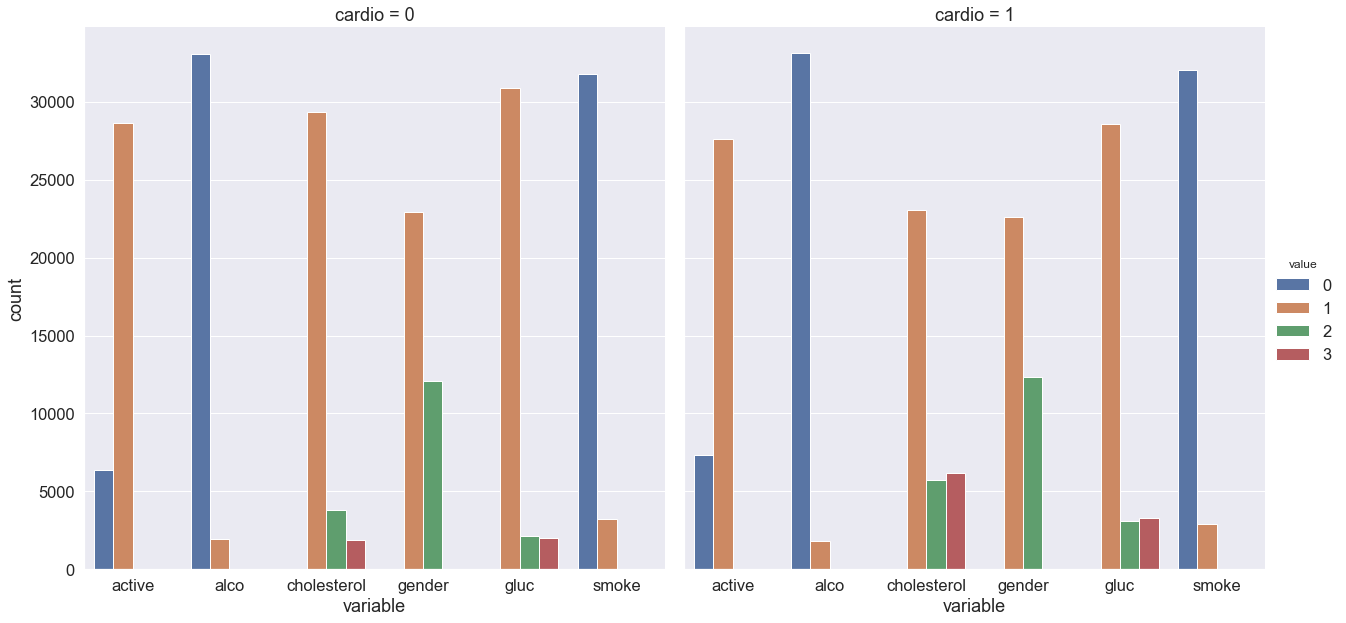

In [170]:
df_uniques = pd.melt(frame=df, value_vars=['gender','cholesterol', 
                                           'gluc', 'smoke', 'alco', 
                                           'active'], 
                     id_vars=['cardio'])
df_uniques = pd.DataFrame(df_uniques.groupby(['variable', 'value', 
                                              'cardio'])['value'].count()) \
    .sort_index(level=[0, 1]) \
    .rename(columns={'value': 'count'}) \
    .reset_index()

sns.factorplot(x='variable', y='count', hue='value', 
               col='cardio', data=df_uniques, kind='bar', size=9)

In [171]:
for c in df.columns:
    n = df[c].nunique()
    print(c)
    if n <= 3:
        print(n, sorted(df[c].value_counts().to_dict().items()))
    else:
        print(n)
    print(10 * '-')

id
70000
----------
age
8076
----------
gender
2 [(1, 45530), (2, 24470)]
----------
height
109
----------
weight
287
----------
ap_hi
153
----------
ap_lo
157
----------
cholesterol
3 [(1, 52385), (2, 9549), (3, 8066)]
----------
gluc
3 [(1, 59479), (2, 5190), (3, 5331)]
----------
smoke
2 [(0, 63831), (1, 6169)]
----------
alco
2 [(0, 66236), (1, 3764)]
----------
active
2 [(0, 13739), (1, 56261)]
----------
cardio
2 [(0, 35021), (1, 34979)]
----------


In [172]:
df

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,99993,19240,2,168,76.0,120,80,1,1,1,0,1,0
69996,99995,22601,1,158,126.0,140,90,2,2,0,0,1,1
69997,99996,19066,2,183,105.0,180,90,3,1,0,1,0,1
69998,99998,22431,1,163,72.0,135,80,1,2,0,0,0,1


In [173]:
df1 = df[['gender','height','weight']]
df1

,gender,height,weight
0,2,168,62.0
1,1,156,85.0
2,1,165,64.0
3,2,169,82.0
4,1,156,56.0
...,...,...,...
69995,2,168,76.0
69996,1,158,126.0
69997,2,183,105.0
69998,1,163,72.0


In [174]:
df1.groupby(by='gender').mean()

,height,weight
gender,,
1,161.355612,72.565605
2,169.947895,77.257307


In [175]:
# 1 - women
# 2 - men

In [176]:
# 1. How many men and women are present in this dataset?
df.gender.value_counts()

1    45530
2    24470
Name: gender, dtype: int64

In [177]:
# 2. Who more often report consuming alcohol - men or women?
df

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,99993,19240,2,168,76.0,120,80,1,1,1,0,1,0
69996,99995,22601,1,158,126.0,140,90,2,2,0,0,1,1
69997,99996,19066,2,183,105.0,180,90,3,1,0,1,0,1
69998,99998,22431,1,163,72.0,135,80,1,2,0,0,0,1


In [178]:
df[['gender','alco']].groupby(by='gender').sum()

,alco
gender,
1,1161
2,2603


In [179]:
# 3. What's the rounded difference between the percentages of smokers among men and women?
df.loc[df.gender == 1].smoke.value_counts()

0    44717
1      813
Name: smoke, dtype: int64

In [180]:
df.loc[df.gender == 2].smoke.value_counts()

0    19114
1     5356
Name: smoke, dtype: int64

In [214]:
(5356/(19114+5356)) - (813/(813+44717))

0.20102390309976736

In [182]:
# 4. What's the rounded difference between median values of age for non-smokers and smokers?
#   You'll need to figure out the units of feature age in this dataset.

In [183]:
df.loc[df.smoke == 0].age.median() - df.loc[df.smoke == 1].age.median() 

597.0

In [184]:
597 / 365 * 12

19.627397260273973

In [185]:
# 1.2. Calculate the fraction of the people with CVD for the two segments described above.
#  What is the ratio of these two fractions?

In [186]:
df['age_years'] = df.age.apply(lambda age: round(age/365)).astype('int')

In [187]:
df

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,age_years
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0,50
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1,55
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1,52
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1,48
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0,48
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,99993,19240,2,168,76.0,120,80,1,1,1,0,1,0,53
69996,99995,22601,1,158,126.0,140,90,2,2,0,0,1,1,62
69997,99996,19066,2,183,105.0,180,90,3,1,0,1,0,1,52
69998,99998,22431,1,163,72.0,135,80,1,2,0,0,0,1,61


In [188]:
smoking_old_men = df[(df['gender'] == 2) & (df['age_years'] >= 60)
                    & (df['age_years'] < 65) & (df['smoke'] == 1)]

In [189]:
smoking_old_men[(smoking_old_men['cholesterol'] == 1) &
               (smoking_old_men['ap_hi'] < 120)]['cardio'].mean()

0.2564102564102564

In [190]:
smoking_old_men[(smoking_old_men['cholesterol'] == 3) &
               (smoking_old_men['ap_hi'] >= 160) &
               (smoking_old_men['ap_hi'] < 180)]['cardio'].mean()

0.8636363636363636

In [191]:
0.86 / 0.26

3.3076923076923075

In [192]:
# 1.3. Analyzing BMI

In [193]:
def f(h, w):
    return w / ((h/100)**2)

In [194]:
df['BMI'] = df[['height', 'weight']].apply(lambda x: f(x.height, x.weight), axis=1)

In [195]:
df

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,age_years,BMI
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0,50,21.967120
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1,55,34.927679
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1,52,23.507805
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1,48,28.710479
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0,48,23.011177
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,99993,19240,2,168,76.0,120,80,1,1,1,0,1,0,53,26.927438
69996,99995,22601,1,158,126.0,140,90,2,2,0,0,1,1,62,50.472681
69997,99996,19066,2,183,105.0,180,90,3,1,0,1,0,1,52,31.353579
69998,99998,22431,1,163,72.0,135,80,1,2,0,0,0,1,61,27.099251


In [196]:
df.BMI.median()

26.374068120774975

In [197]:
df.groupby('gender')['BMI'].median()

gender
1    26.709402
2    25.910684
Name: BMI, dtype: float64

In [198]:
df.groupby(['gender', 'alco', 'cardio'])['BMI'].median().to_frame()

BMI
gender alco cardio           
1      0    0       25.654372
            1       27.885187
       1    0       27.885187
            1       30.110991
2      0    0       25.102391
            1       26.674874
       1    0       25.351541
            1       27.530797

In [199]:
df

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,age_years,BMI
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0,50,21.967120
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1,55,34.927679
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1,52,23.507805
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1,48,28.710479
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0,48,23.011177
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,99993,19240,2,168,76.0,120,80,1,1,1,0,1,0,53,26.927438
69996,99995,22601,1,158,126.0,140,90,2,2,0,0,1,1,62,50.472681
69997,99996,19066,2,183,105.0,180,90,3,1,0,1,0,1,52,31.353579
69998,99998,22431,1,163,72.0,135,80,1,2,0,0,0,1,61,27.099251


In [200]:
# 1.4. Cleaning data

In [201]:
df

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,age_years,BMI
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0,50,21.967120
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1,55,34.927679
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1,52,23.507805
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1,48,28.710479
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0,48,23.011177
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,99993,19240,2,168,76.0,120,80,1,1,1,0,1,0,53,26.927438
69996,99995,22601,1,158,126.0,140,90,2,2,0,0,1,1,62,50.472681
69997,99996,19066,2,183,105.0,180,90,3,1,0,1,0,1,52,31.353579
69998,99998,22431,1,163,72.0,135,80,1,2,0,0,0,1,61,27.099251


In [202]:
# df = df.drop(index = df[(df.ap_lo > df.ap_hi)].index).reset_index()

In [203]:
filtered_df = df[(df['ap_lo'] <= df['ap_hi']) & 
                 (df['height'] >= df['height'].quantile(0.025)) &
                 (df['height'] <= df['height'].quantile(0.975)) &
                 (df['weight'] >= df['weight'].quantile(0.025)) & 
                 (df['weight'] <= df['weight'].quantile(0.975))]
print(filtered_df.shape[0] / df.shape[0])

0.9037


In [204]:
# 2.1. Correlation matrix visualization

In [210]:
df_to_heatmap = df[['height','weight','cholesterol','alco','cardio','smoke','gluc']]

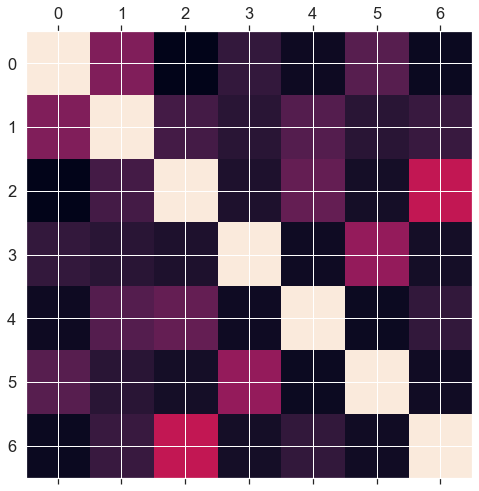

In [211]:
plt.matshow(df_to_heatmap.corr())
plt.show()

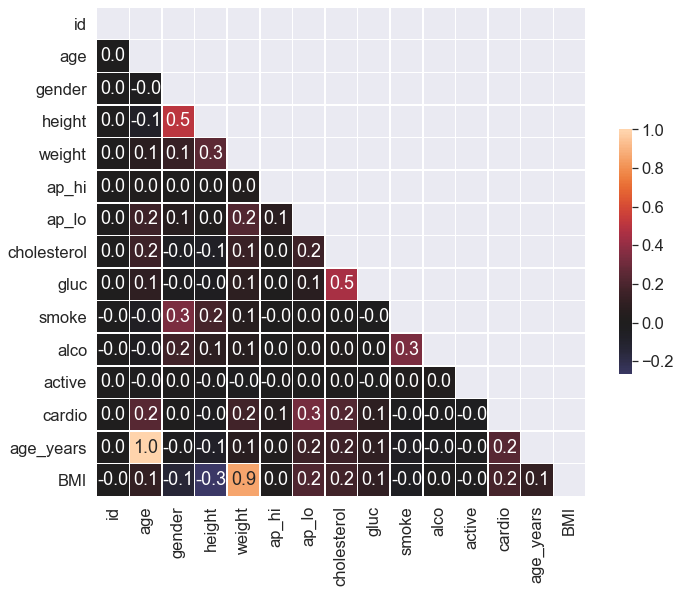

In [217]:
# Calculate the correlation matrix
df = filtered_df.copy()

corr = df.corr(method='pearson')

# Create a mask to hide the upper triangle of the correlation matrix (which is symmetric)
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

f, ax = plt.subplots(figsize=(12, 9))

sns.heatmap(corr, mask=mask, vmax=1, center=0, annot=True, fmt='.1f',
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [207]:
# 2.2. Height distribution of men and women

In [155]:
df = pd.melt(df, value_vars=['height'], id_vars='gender')

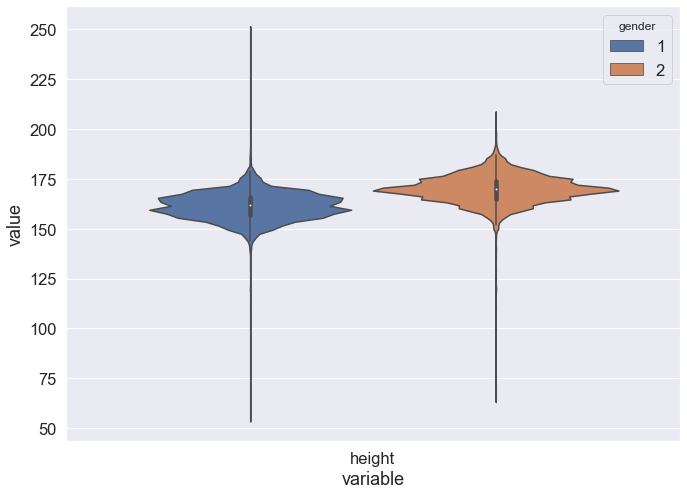

In [158]:
sns.violinplot(x='variable', y='value', hue='gender', data=df)
plt.show()

In [161]:
# 2.3. Rank correlation

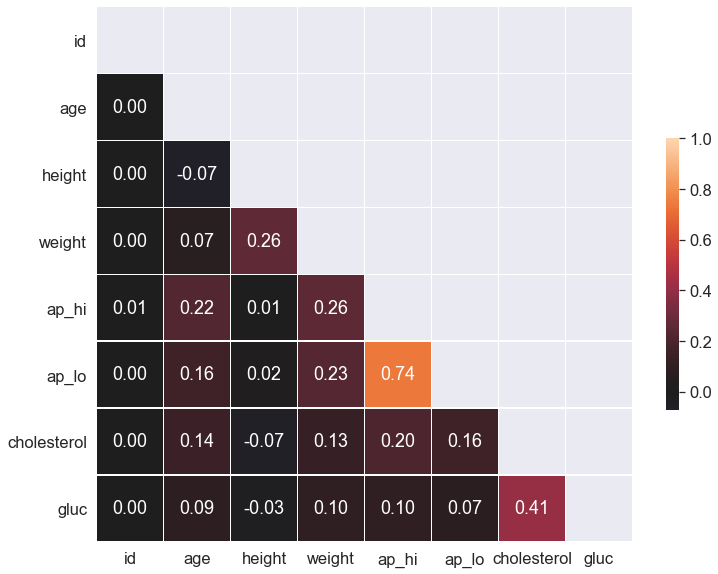

In [218]:
# Calculate the correlation matrix
corr = df[['id', 'age', 'height', 'weight', 
           'ap_hi', 'ap_lo', 'cholesterol', 
           'gluc']].corr(method='spearman')

# Create a mask to hide the upper triangle of the correlation matrix (which is symmetric)
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

f, ax = plt.subplots(figsize=(12, 10))

# Plot the heatmap using the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, vmax=1, center=0, annot=True, fmt='.2f',
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [ ]:
# 2.4. Age

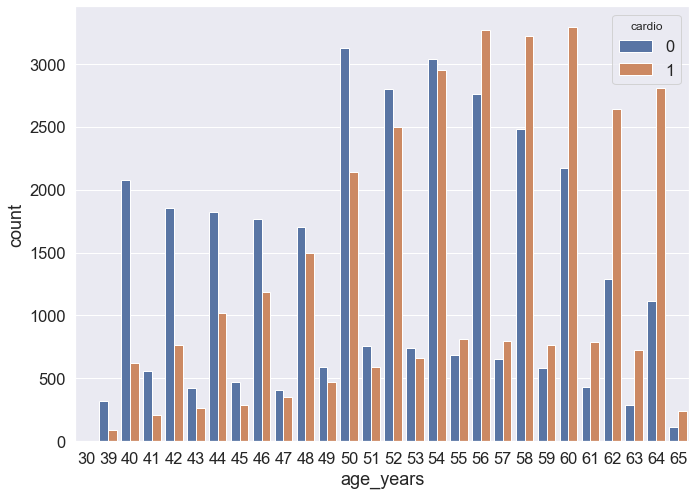

In [209]:
sns.countplot(x='age_years', hue='cardio', data=df)